# Cholesky Decomposition

## Dependency

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Big picture

**Cholesky decomposition** decomposes a given matrix $A$ into 2 **triangular matrices**. $L$ is a **lower triangular matrix** where the elements above the diagonal elements are all 0, but there are numbers in diagonal elements and below.

$$
A = L L^T
$$

Cholesky decomposition can be done by iterative computation, so we should think about it like algorithm rather than math.

In [66]:
def cholesky_decomposition(A):
    """
    A is a square symmetric matrix
    L is a lower triangular matrix
    """
    m = len(A)
    L = np.zeros((m, m))
    
    for i in range(m):
        for j in range(i + 1):
            
            sum_ = 0
            
            if i == j:
                for k in range(j):
                    sum_ += np.power(L[j][k], 2)
                L[j][j] = np.sqrt(A[j][j] - sum_)
                
            else:
                
                for k in range(j):
                    sum_ += L[i][k] * L[j][k]
                    
                if L[j][j] > 0:
                    L[i][j] = (A[i][j] - sum_) / L[j][j]
    
    return L


L = cholesky_decomposition(A)
print(L)

[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]


In [57]:
A = np.array([
    [4, 12, -16],
    [12, 37, -43],
    [-16, -43, 98]
])

L = np.linalg.cholesky(A)

print('Original A')
print(A)
print()

print('L')
print(L)
print()

print('L L^T')
print(L @ L.T)
print()

Original A
[[  4  12 -16]
 [ 12  37 -43]
 [-16 -43  98]]

L
[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]

L L^T
[[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]



## Correlated random variable for Monte-Carlo Simulation

In [28]:
mean = 0.0
std = 1.0
n = 10000
p = 2

data = np.random.normal(
    loc=mean,
    scale=std,
    size=(n, p)
)

df = pd.DataFrame(data, columns=['x1', 'x2'])

print(df.shape)

(10000, 2)


In [29]:
df.head()

,x1,x2
0,-0.948620,0.012911
1,-0.853982,-0.529875
2,-1.259700,-0.610670
3,0.757465,-0.235363
4,-1.208893,-0.155683


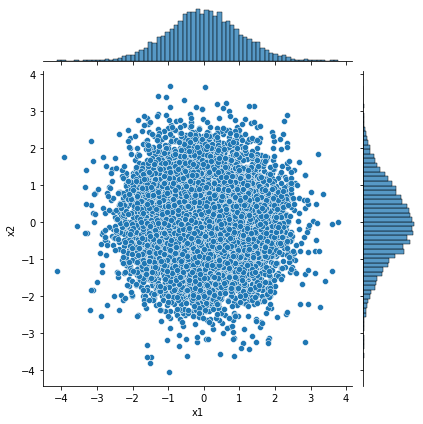

In [32]:
sns.jointplot(data=df, x='x1', y='x2')
plt.show()

In [52]:
corr = 0.8

corr_mat = np.array([
    [1, corr],
    [corr, 1]
])

L = np.linalg.cholesky(corr_mat)

data_corr = np.dot(data, L)

df_corr = pd.DataFrame(data_corr, columns=['x1', 'x2'])

corr_simulated, _ = pearsonr(df_corr['x1'], df_corr['x2'])

print(df_corr.shape)
print(f'Simulated correlation: {corr_simulated:.1%}')

(10000, 2)
Simulated correlation: 61.7%


In [43]:
df_corr.head()

,x1,x2
0,-0.938291,0.007747
1,-1.277882,-0.317925
2,-1.748236,-0.366402
3,0.569175,-0.141218
4,-1.333440,-0.093410


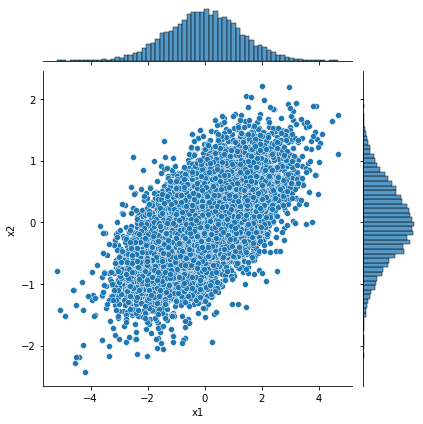

In [44]:
sns.jointplot(data=df_corr, x='x1', y='x2')
plt.show()

## Reference
- [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)
- [Cholesky Decomposition : Matrix Decomposition](https://www.geeksforgeeks.org/cholesky-decomposition-matrix-decomposition/)
- [Cholesky Decomposition in Python and NumPy](https://www.quantstart.com/articles/Cholesky-Decomposition-in-Python-and-NumPy/)
- [Behind The Models: Cholesky Decomposition](https://towardsdatascience.com/behind-the-models-cholesky-decomposition-b61ef17a65fb)
- [Algorithm for Cholesky Decomposition](http://www.math.sjsu.edu/~foster/m143m/cholesky.pdf)